# Chipo 数据集

### Step 1. 导入库

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import ssl
ssl._create_default_https_context = ssl._create_unverified_context # 全局取消证书验证

### Step 2. 导入数据，并命名为chipo： [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv)



In [2]:
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'
chipo = pd.read_csv(url, sep='\t')

### Step 3. 查看数据

#### 3.1 查看前十行

In [3]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


#### 3.2 数据的行数和列数以及名称

In [4]:
chipo.shape # 行数和列数：(4622, 5)
chipo.shape[0]  # 行数：4622

4622

In [5]:
chipo.columns # 列名
chipo.index   # 行名

RangeIndex(start=0, stop=4622, step=1)

In [6]:
chipo.info() # 数据信息

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
order_id              4622 non-null int64
quantity              4622 non-null int64
item_name             4622 non-null object
choice_description    3376 non-null object
item_price            4622 non-null object
dtypes: int64(2), object(3)
memory usage: 180.6+ KB


### Step 4. 被下单数最多的item_name, 以及其数量 

In [3]:
chipo['item_name'].value_counts().idxmax(), chipo['item_name'].value_counts().max()

('Chicken Bowl', 726)

In [27]:
chipo.groupby('item_name').size().sort_values(ascending=False).head()

item_name
Chicken Bowl           726
Chicken Burrito        553
Chips and Guacamole    479
Steak Burrito          368
Canned Soft Drink      301
dtype: int64

In [26]:
chipo['item_name'].value_counts().sort_values(ascending=False).head()

Chicken Bowl           726
Chicken Burrito        553
Chips and Guacamole    479
Steak Burrito          368
Canned Soft Drink      301
Name: item_name, dtype: int64

### Step 5. 将item_price列转换成数值类型

#### 5.1 查看item_price列的数据类型

In [8]:
chipo['item_price'].dtype

dtype('O')

#### 5.2 将其转换成数值类型并检查

In [4]:
chipo['price'] = chipo['item_price'].apply(lambda x: float(x[1:]))
chipo.price.dtype 

dtype('float64')

### Step 6. 总收入

In [10]:
np.sum(chipo.price) # item_price显示的是总价

34500.16

### Step 7. 一共有多少种不同的item_name

In [10]:
chipo.item_name.nunique() # 50

50

In [11]:
chipo.item_name.value_counts().count() # 50

50

### Step 8. 多少产品的单价比10美元高?

In [12]:
chipo.loc[(chipo['price']/chipo['quantity']) > 10, 'item_name'].nunique() # price显示的为总价

25

### Step 9. 每一个item的单价, 输出为两列的DataFrame：item_name、item_price

In [13]:
# 同一个item_name可能有不同的价格，因此显示范围
chipo['unit_price'] = chipo['price']/chipo['quantity']
df = chipo.groupby('item_name')['unit_price'].agg([('price_min', np.min), ('price_max', np.max)])
    
df['price_min'] = df['price_min'].apply(lambda x: str(round(x,2))) # 或者.astype(str)
df['price_max'] = df['price_max'].apply(lambda x: str(round(x,2)))

df['item_price'] = df['price_min'] + '-' + df['price_max']
df.loc[df.price_min==df.price_max, 'item_price'] = df.loc[df.price_min==df.price_max, 'price_min']
df.drop(['price_min', 'price_max'], axis=1).head()

,item_price
item_name,
6 Pack Soft Drink,6.49
Barbacoa Bowl,8.69-11.75
Barbacoa Burrito,8.69-11.75
Barbacoa Crispy Tacos,8.99-11.75
Barbacoa Salad Bowl,9.39-11.89


### Step 10. 按item_name排序

In [14]:
chipo.sort_values(by='item_name').head()  # chipo.item_name.sort_values()

,order_id,quantity,item_name,choice_description,item_price,price,unit_price
3389,1360,2,6 Pack Soft Drink,[Diet Coke],$12.98,12.98,6.49
341,148,1,6 Pack Soft Drink,[Diet Coke],$6.49,6.49,6.49
1849,749,1,6 Pack Soft Drink,[Coke],$6.49,6.49,6.49
1860,754,1,6 Pack Soft Drink,[Diet Coke],$6.49,6.49,6.49
2713,1076,1,6 Pack Soft Drink,[Coke],$6.49,6.49,6.49


### Step 11. item_price最贵的item_name对应的quantity

In [15]:
chipo.quantity[chipo.price.idxmax()]  # 'argmax' is deprecated, use 'idxmax' instead.

15

In [16]:
chipo.sort_values(by = "price", ascending = False).head(1)

,order_id,quantity,item_name,choice_description,item_price,price,unit_price
3598,1443,15,Chips and Fresh Tomato Salsa,NaN,$44.25,44.25,2.95


### Step 12. Veggie Salad Bowl被下单了多少次?

In [17]:
np.sum(chipo.item_name=='Veggie Salad Bowl')

18

### Step 13. quantity>1的Canned Soda的数量?

In [18]:
np.sum((chipo.item_name=='Canned Soda') & (chipo.quantity > 1)) # and不行

20

### Step 14. 柱状图：下单数最多的item及下单数

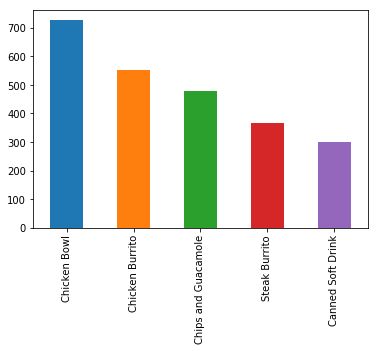

In [9]:
top_5_items = chipo.item_name.value_counts().sort_values(ascending=False).head()
top_5_items.plot(kind='bar')

Text(0.5,1,'Top5 Items')

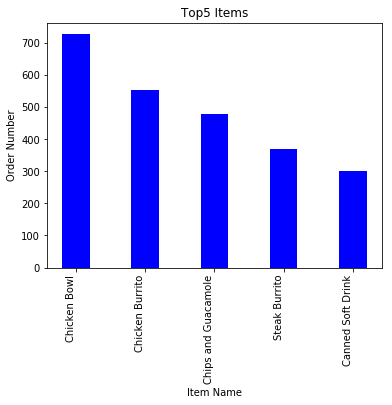

In [7]:
top_5_items = chipo.item_name.value_counts().sort_values(ascending=False).head()

fig = plt.figure(figsize=(6, 5))
plt.bar(top_5_items.index,top_5_items.values, width=0.4, color='b')
plt.xlabel('Item Name')
plt.ylabel('Order Number')
fig.autofmt_xdate(rotation=90)   # 使得标签进行角度翻转
plt.title('Top5 Items')

In [11]:
type(top_5_items)

pandas.core.series.Series